In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

C:\Users\Mohamed Koresh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
car_ds = pd.read_csv("D:\ml new\Car\car data.csv")

In [3]:
car_ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_ds.shape

(301, 9)

In [5]:
car_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# check categorical data
print(car_ds.Fuel_Type.value_counts())
print(car_ds.Seller_Type.value_counts())
print(car_ds.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [7]:
# encoding categorical data

car_ds.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
car_ds = car_ds.infer_objects(copy=False)
car_ds.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
car_ds = car_ds.infer_objects(copy=False)
car_ds.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)
car_ds = car_ds.infer_objects(copy=False)


C:\Users\Mohamed Koresh\AppData\Local\Temp\ipykernel_9140\3127853669.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_ds.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
C:\Users\Mohamed Koresh\AppData\Local\Temp\ipykernel_9140\3127853669.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_ds.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
C:\Users\Mohamed Koresh\AppData\Local\Temp\ipykernel_9140\3127853669.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will

In [8]:
car_ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Model

In [9]:
    X = car_ds.drop(["Selling_Price","Car_Name"],axis=1)
    Y = car_ds["Selling_Price"]

In [10]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state=2)

In [13]:
Linear_mod = LinearRegression()

In [14]:
Linear_mod.fit(X_train,Y_train)

LinearRegression()

In [15]:
traing_data_prediction = Linear_mod.predict(X_train)

In [16]:
error_score = metrics.r2_score(Y_train,traing_data_prediction)
print(error_score)

0.8799451660493698


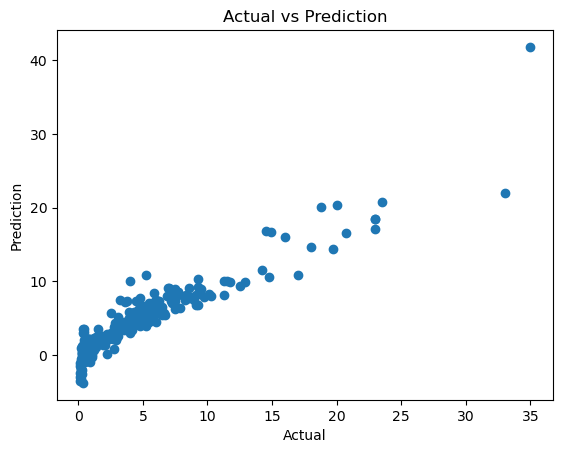

In [18]:
plt.scatter(Y_train,traing_data_prediction)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Actual vs Prediction")
plt.show()

In [20]:
test_data_prediction = Linear_mod.predict(X_test)

In [21]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.8365766715026903


In [23]:
Lasso_mod = Lasso()

In [24]:
Lasso_mod.fit(X_train,Y_train)

Lasso()

In [26]:
traing_data_prediction2 = Lasso_mod.predict(X_train)

In [27]:
error_score = metrics.r2_score(Y_train,traing_data_prediction2)
print(error_score)

0.8427856123435794


In [28]:
test_data_prediction2 = Lasso_mod.predict(X_test)

In [30]:
error_score = metrics.r2_score(Y_test,test_data_prediction2)
print(error_score)

0.8709167941173195
